# HW_04 by Andrew Lee

Import data

In [2]:
import pandas as pd

# import data from csv

df = pd.read_csv('./wentworth_applied_analytics - levers.csv.csv')

print(df.head(3))

   emp_id  prev_month_sales  employee_age  sales_training  employment_tenure  \
0       1               105            35               2                 13   
1       2                18            29               1                  1   
2       3                82            35               2                 14   

   conversion  compensation_plan  num_calls  
0    1.418445                  0         26  
1    0.029898                  0         10  
2    0.468384                  0         10  


### As a call center sales business your goal is to optimize sales (revenue, $). Using previous months sales as a dependent variable (outcome variable), explore all possible combinations of independent variables to try to achieve the highest coefficient of determination (r^2, highest predictive ability against your dependent). Please make sure you test all of the fundamental assumptions and report any issues.

In [3]:
print(df.columns)

Index(['emp_id', 'prev_month_sales', 'employee_age', 'sales_training',
       'employment_tenure', 'conversion', 'compensation_plan', 'num_calls'],
      dtype='object')


There are 8 features in the dataset and we can ignore the id column.
Dependent variable: prev_month_sales
Independent variable: employee_age, sales_training, employment_tenure, conversion, compensation_plan, num_calls. 

Preparing Dataset

In [4]:
X = df[['employee_age', 'sales_training','employment_tenure', 'conversion', 'compensation_plan', 'num_calls']]
Y = df['prev_month_sales']

## Data Pre-analytics

Fig1 . Scatter plots for sales_training,employment_tenure,conversion,num_calls vs sales


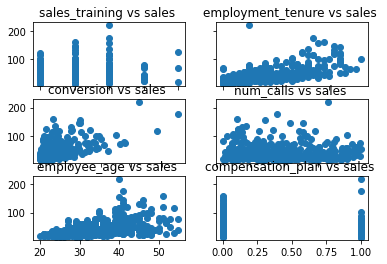

In [19]:
import matplotlib.pyplot as plt
print("Fig1 . Scatter plots for sales_training,employment_tenure,conversion,num_calls vs sales")
fig, axs = plt.subplots(3, 2)
# Create the scatter plot
axs[0, 0].scatter(df[['sales_training']], Y)
axs[0, 0].set_title("sales_training vs sales ")
axs[0, 1].scatter(df[['employment_tenure']], Y)
axs[0, 1].set_title("employment_tenure vs sales ")
axs[1, 0].scatter(df[['conversion']], Y)
axs[1, 0].set_title("conversion vs sales ")
axs[1, 1].scatter(df[['num_calls']], Y)
axs[1, 1].set_title("num_calls vs sales ")
axs[2, 0].scatter(df[['employee_age']], Y)
axs[2, 0].set_title("employee_age vs sales ")
axs[2, 1].scatter(df[['compensation_plan']], Y)
axs[2, 1].set_title("compensation_plan vs sales ")
for ax in axs.flat:
    ax.label_outer()
# Show the plot
plt.show()


When we look at Fig 2, we can see all the features are not linear with the sale result and it shows it is difficult to get a good prediction from single feature linear regression. However, the employment tenure and conversion features both have hidden positive shapes. They may provide a good effect on multiple linear regression. About other features,the sales training, compensation plan and the number of calls features don't have a clear trend. The employee age feature has a lot of outler on the middle of the dataset. We can assume they have less effect on the prediction.

Built powerset function to loop all possible independent variables

In [20]:
# powerset function to get all possible combination 
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

Results = pd.DataFrame([], columns=["features","r2","mse"])
for subset in powerset(X.columns):
    if len(subset) > 0:
        X =df[list(subset)]
        #split dataset
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=5)
        #build model
        model = LinearRegression()
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(Y_test, predictions)
        r2 = r2_score(Y_test, predictions)
        newResult = pd.DataFrame([{'features': ','.join(list(subset)), 'mse': round(mse,3), 'r2': round(r2,3), 'nFeatures':len(list(subset))}], columns=["features","r2","mse","nFeatures"])
        Results= pd.concat([Results,newResult])
print("Fig2. top 5 features with the largest r2")
Results.sort_values(by="r2",ascending=False).head(5)

Fig2. top 5 features with the largest r2


,features,r2,mse,nFeatures
0,"sales_training,employment_tenure,conversion,nu...",0.756,262.358,4.0
0,"sales_training,employment_tenure,conversion",0.729,292.188,3.0
0,"employment_tenure,conversion,num_calls",0.696,327.09,3.0
0,"employment_tenure,conversion",0.666,359.058,2.0
0,"sales_training,employment_tenure",0.59,441.661,2.0


In [6]:
print("features with biggest r2")
print(Results[Results["nFeatures"]==4].max()["features"])

features with biggest r2
sales_training,employment_tenure,conversion,num_calls


In the top 5 features with largest r2 table, we can see there is a model that has 0.756 r-squared score and with 4 features (sales training,employment tenure, conversion, and number of calls).

### Result Analytics

Load model with biggest r2

In [21]:
X = df[['sales_training','employment_tenure','conversion','num_calls']]
Y = df['prev_month_sales']
#split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=5)
        #build model
model = LinearRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

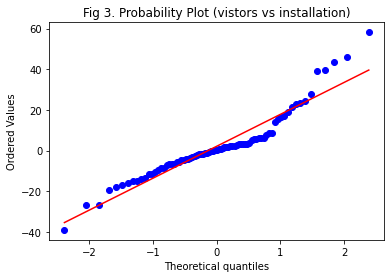

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Make predictions and calculate residuals
residuals = Y_test - predictions
X_test

# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 3. Probability Plot (vistors vs installation)")
plt.show()

In Fig. 3 most of the predicted result are close to the line in the probability plot. Although the right tail of the data are off the line, but we could still say this is normality since the dataset is small.

In conclusion, the highest coefficient of determateration are sales training,employment tenure, conversion, and number of calls and provides around 0.756 r2 score. It seems 